## Install Libraries
1. python3 -m venv proj2env
2. source proj2env/bin/activate
3. pip install --upgrade pip
4. pip install torch
5. pip install torchvision
6. pip install pybind11
7. brew install pybind11

1. conda create --prefix "/Users/rishabhshah/Desktop/AIPI590/Project2/condaprojenv" python=3.11
2. conda activate "/Users/rishabhshah/Desktop/AIPI590/Project2/condaprojenv"
3. conda install pytorch==2.0.1 torchvision==0.15.2 torchaudio==2.0.2 -c pytorch
4. pip install pybind11
5. brew install pybind11  
6. python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'
7. pip install opencv-python
<!-- 7. CC=clang CXX=clang++ ARCHFLAGS="-arch x86_64" python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'
1. git clone https://github.com/facebookresearch/detectron2.git
python -m pip install -e detectron2 -->



Merge Different COCO dataset
https://gradiant.github.io/pyodi/reference/apps/coco-merge/
pyodi coco merge coco_1.json coco_2.json output.json


rishabh13proj@gmail.com -- drinks
rishabhshah1998@gmail.com -- utensils
rishabhshah13@gmail.com -- laptops

In [1]:

# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
# from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [2]:
# pip install COCO-merger
# INITIAL COMMAND python -m COCO_merger.merge --src Json1.json Json2.json --out OUTPUT_JSON.json
# python -m COCO_merger.merge --src "/Users/rishabhshah/Desktop/AIPI590/Project2/DatasetDetectron2/annotations/drinks_instances_default.json" "/Users/rishabhshah/Desktop/AIPI590/Project2/DatasetDetectron2/annotations/utensils_instances_default.json"  --out "/Users/rishabhshah/Desktop/AIPI590/Project2/DatasetDetectron2/annotations/output.json"

# python -m COCO_merger.merge --src "/Users/rishabhshah/Desktop/AIPI590/Project2/DatasetDetectron2/annotations/output.json" "/Users/rishabhshah/Desktop/AIPI590/Project2/DatasetDetectron2/annotations/laptops_instances_default.json" --out "/Users/rishabhshah/Desktop/AIPI590/Project2/DatasetDetectron2/annotations/output.json"

# pyodi coco merge "/Users/rishabhshah/Desktop/AIPI590/Project2/DatasetDetectron2/annotations/drinks_instances_default.json" "/Users/rishabhshah/Desktop/AIPI590/Project2/DatasetDetectron2/annotations/utensils_instances_default.json" output.json


In [3]:
# python -m COCO_merger.merge --src "/Users/rishabhshah/Desktop/AIPI590/Project2/DatasetDetectron2/annotations/drinks_instances_default.json" "/Users/rishabhshah/Desktop/AIPI590/Project2/DatasetDetectron2/annotations/laptops_instances_default.json"  --out "/Users/rishabhshah/Desktop/AIPI590/Project2/DatasetDetectron2/annotations/output.json"

In [4]:
# import json

# # Load the COCO JSON dataset
# with open("/Users/rishabhshah/Desktop/AIPI590/Project2/DatasetDetectron2/annotations/utensils_instances_default.json", 'r') as f:
#     dataset = json.load(f)

# # Let's say you want to delete the annotations for instances with IDs 123 and 456
# image_ids_to_delete = [17,18, 19, 20,22,44, 43, 102,112, 113]

# # # Find and remove the annotations for the specified instances
# # for image in dataset['images']:
# #     annotations_to_delete = []
# #     for annotation in dataset['annotations']:
# #         if annotation['image_id'] == image['id'] and annotation['id'] in instance_ids_to_delete:
# #             annotations_to_delete.append(annotation)
            
# #     # print(annotations_to_delete)
# #     # # Remove the annotations for the instances
# #     # for annotation_to_delete in annotations_to_delete:
# #     #     dataset['annotations'].remove(annotation_to_delete)

# # # Find and remove the annotations for the specified image IDs
# # annotations_to_delete = [annotation for annotation in dataset['annotations'] if annotation['image_id'] in image_ids_to_delete]
# # dataset['annotations'] = [annotation for annotation in dataset['annotations'] if annotation['image_id'] not in image_ids_to_delete]

# # # Remove the images from the dataset
# # dataset['images'] = [image for image in dataset['images'] if image['id'] not in image_ids_to_delete]

# # Keep only the first 50 images and their annotations
# dataset['images'] = dataset['images'][:1]

# # Get the image IDs of the first 50 images
# image_ids_to_keep = [image['id'] for image in dataset['images']]

# # Filter out annotations related to images beyond the first 50
# dataset['annotations'] = [annotation for annotation in dataset['annotations'] if annotation['image_id'] in image_ids_to_keep]


# # Save the modified dataset
# with open("/Users/rishabhshah/Desktop/AIPI590/Project2/DatasetDetectron2/annotations/utensils_instances_default.json", 'w') as f:
#     json.dump(dataset, f)


In [5]:
from detectron2.data.datasets import register_coco_instances
# register_coco_instances("experiment", {}, "/Users/rishabhshah/Desktop/AIPI590/Project2/DatasetDetectron2/annotations/utensils_instances_default.json", "/Users/rishabhshah/Desktop/AIPI590/Project2/Dataset/Utensils/images")
register_coco_instances("experiment", {}, "/Users/rishabhshah/Desktop/AIPI590/Project2/DatasetDetectron2/annotations/output.json", "/Users/rishabhshah/Desktop/AIPI590/Project2/MergeDataset/train/")
# register_coco_instances("experiment", {}, "/Users/rishabhshah/Desktop/AIPI590/Project2/DatasetDetectron2/annotations/laptops_instances_default.json", "/Users/rishabhshah/Desktop/AIPI590/Project2/MergeDataset/train/")
# register_coco_instances("experiment", {}, "/Users/rishabhshah/Desktop/AIPI590/Project2/DatasetDetectron2/annotations/utensils_instances_default.json", "/Users/rishabhshah/Desktop/AIPI590/Project2/MergeDataset/train/")

In [6]:
sample_metadata = MetadataCatalog.get("experiment")
dataset_dicts = DatasetCatalog.get("experiment")

[03/16 23:37:31 d2.data.datasets.coco]: Loaded 305 images in COCO format from /Users/rishabhshah/Desktop/AIPI590/Project2/DatasetDetectron2/annotations/output.json


In [7]:
# for idx,d in enumerate(dataset_dicts[:]):
#     # print(d['annotations'][0]['category_id'])
#     if len(d['annotations']) == 0:
#         print(d)
#         print(idx)
#         # DatasetCatalog.get("experiment").remove(d)

#         # import random
#         # from matplotlib import pyplot as plt

#         # print(d)
#         # img = cv2.imread(d["file_name"])
#         # visualizer = Visualizer(img[:, :, ::-1], metadata=sample_metadata, scale=0.5)
#         # vis = visualizer.draw_dataset_dict(d)
#         # # cv2.imshow("preview", vis.get_image()[:, :, ::-1])
#         # # cv2.imshow(vis.get_image()[:, :, ::-1])
#         # # cv2_imshow(vis.get_image()[:, :, ::-1])
#         # # cv2.imwrite(out_file_name, result_image)
#         # plt.imshow(vis.get_image()[:, :, ::-1])
#         # plt.show()

{'file_name': '/Users/rishabhshah/Desktop/AIPI590/Project2/MergeDataset/train/IMG_5257.JPG', 'height': 4032, 'width': 3024, 'image_id': 76, 'annotations': [{'iscrowd': 0, 'bbox': [0.0, 1319.0, 563.0, 1034.0], 'category_id': 0, 'bbox_mode': <BoxMode.XYWH_ABS: 1>}, {'iscrowd': 0, 'bbox': [1474.0, 2451.0, 483.0, 957.0], 'category_id': 0, 'bbox_mode': <BoxMode.XYWH_ABS: 1>}]}


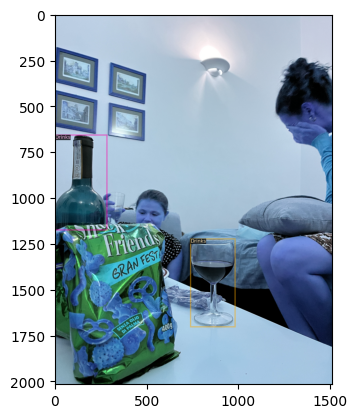

In [8]:
import random
from matplotlib import pyplot as plt


for d in random.sample(dataset_dicts, 1):
    print(d)
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=sample_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    # cv2.imshow("preview", vis.get_image()[:, :, ::-1])
    # cv2.imshow(vis.get_image()[:, :, ::-1])
    # cv2_imshow(vis.get_image()[:, :, ::-1])
    # cv2.imwrite(out_file_name, result_image)
    plt.imshow(vis.get_image()[:, :, ::-1])
    plt.show()

In [9]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import os

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
# cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("experiment",)
cfg.DATASETS.TEST = ()   # no metrics implemented for this dataset
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")# initialize from model zoo
# cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml")# initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.02
cfg.SOLVER.MAX_ITER = 200   # 300 iterations seems good enough, but you can certainly train longer
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this toy dataset
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 3 # 3 classes (Person, Helmet, Car)
cfg.MODEL.DEVICE = 'cpu'
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=True)
trainer.train()

[03/16 23:37:32 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

/Users/rishabhshah/Desktop/AIPI590/Project2/condaprojenv/lib/python3.11/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1682343668887/work/aten/src/ATen/native/TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[03/16 23:38:39 d2.utils.events]:  eta: 0:10:38  iter: 19  total_loss: 1.537  loss_cls: 0.6635  loss_box_reg: 0.7722  loss_rpn_cls: 0.01344  loss_rpn_loc: 0.0137    time: 3.5484  last_time: 3.0297  data_time: 0.0940  last_data_time: 0.0008   lr: 0.0019181  
[03/16 23:39:50 d2.utils.events]:  eta: 0:09:26  iter: 39  total_loss: 1.102  loss_cls: 0.3881  loss_box_reg: 0.5463  loss_rpn_cls: 0.009948  loss_rpn_loc: 0.01235    time: 3.5694  last_time: 3.4162  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0039161  
[03/16 23:41:16 d2.utils.events]:  eta: 0:08:32  iter: 59  total_loss: 0.7662  loss_cls: 0.2881  loss_box_reg: 0.4165  loss_rpn_cls: 0.01679  loss_rpn_loc: 0.01552    time: 3.8203  last_time: 3.4932  data_time: 0.0014  last_data_time: 0.0010   lr: 0.0059141  
[03/16 23:42:36 d2.utils.events]:  eta: 0:07:42  iter: 79  total_loss: 0.6757  loss_cls: 0.296  loss_box_reg: 0.3391  loss_rpn_cls: 0.01701  loss_rpn_loc: 0.01923    time: 3.8737  last_time: 3.8259  data_time: 0.0012  last

In [10]:

# # Look at training curves in tensorboard:
# %load_ext tensorboard
# %tensorboard --logdir output

In [11]:

cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # set the testing threshold for this model
cfg.DATASETS.TEST = ("experiment",)
predictor = DefaultPredictor(cfg)

[03/16 23:50:54 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/model_final.pth ...


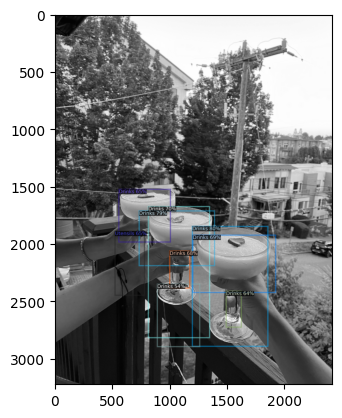

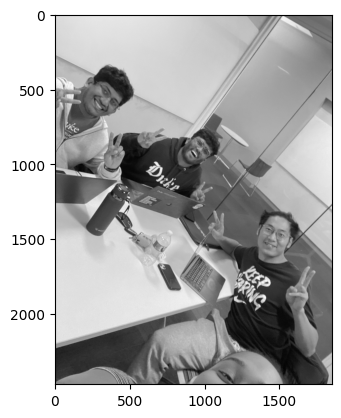

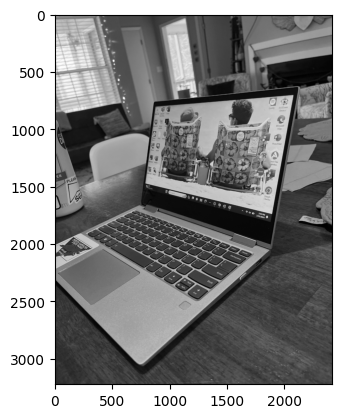

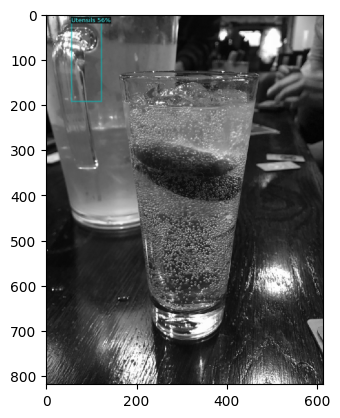

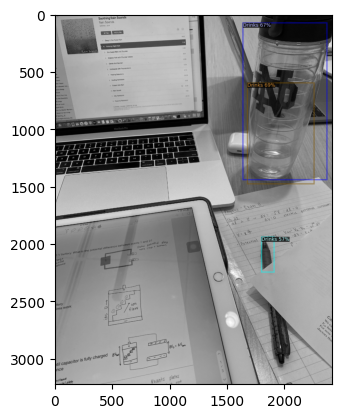

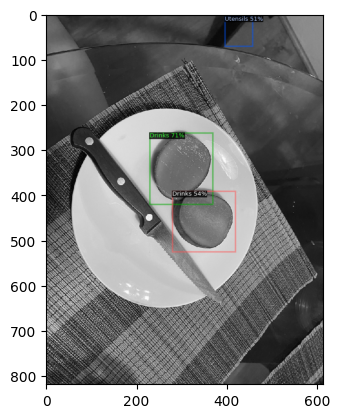

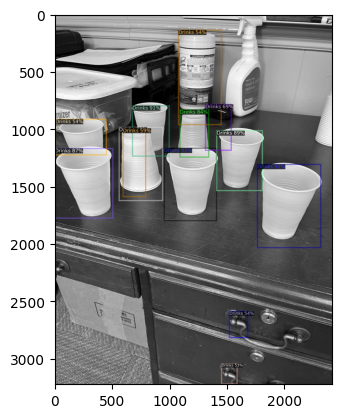

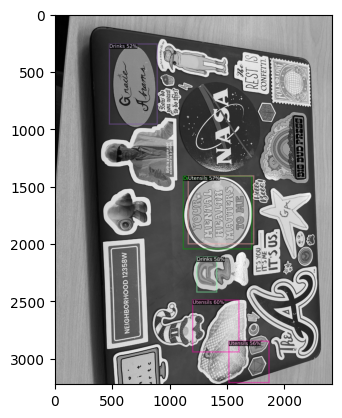

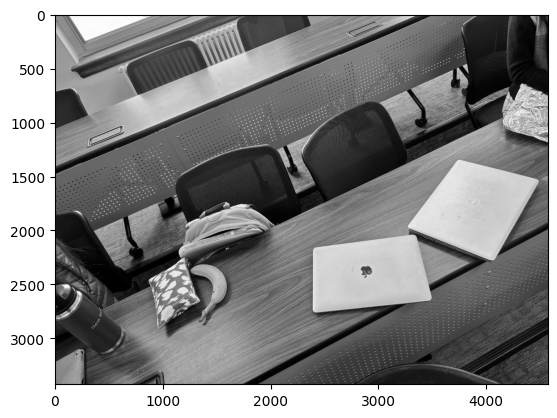

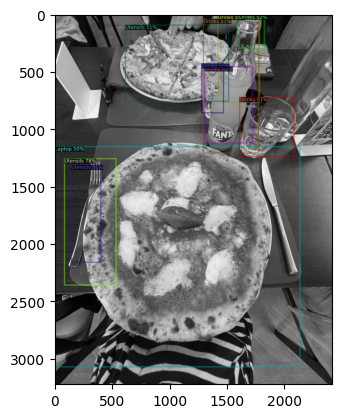

In [12]:
from detectron2.utils.visualizer import ColorMode

for d in random.sample(dataset_dicts, 10):    
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=sample_metadata, 
                   scale=0.8, 
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
    )
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    # cv2_imshow(v.get_image()[:, :, ::-1])
    plt.imshow(v.get_image()[:, :, ::-1])
    plt.show()